In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("London.csv")

In [163]:
df

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
...,...,...,...,...,...,...,...,...,...,...,...
3475,3475,One Lillie Square,3350000,New development,1410,3,3,3,NaN,Lillie Square,SW6 1UE
3476,3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT
3477,3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR


Text(0.5, 1.0, 'Original data set')

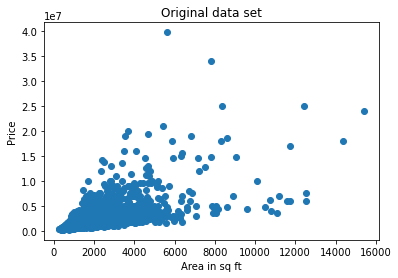

In [164]:
plt.scatter(df['Area in sq ft'], df.Price)
plt.xlabel('Area in sq ft')
plt.ylabel('Price')
plt.title('Original data set')

In [165]:
#creating new data set with relevant features and reducing the size of it for a training sample first
df1 = df[['Price','Area in sq ft']]
df1 = df1.sample(n=200, random_state=1)

In [166]:
#checking for any missing values
df1.isnull().sum()

Price            0
Area in sq ft    0
dtype: int64

Text(0.5, 1.0, 'Reduced data set')

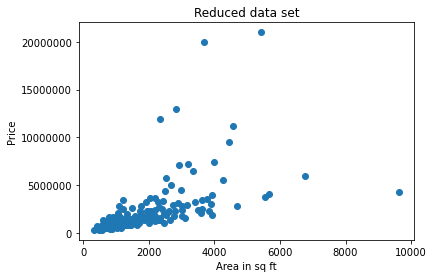

In [167]:
plt.ticklabel_format(useOffset=False, style='plain')
plt.scatter(df1['Area in sq ft'], df1.Price)
plt.xlabel('Area in sq ft')
plt.ylabel('Price')
plt.title('Reduced data set')

In [168]:
#manually removing some outliers in the data
df1.drop(df1[df1['Price'] > 10_000_000].index, inplace = True)
df1.drop(df1[df1['Area in sq ft'] > 9_000].index, inplace = True)

Text(0.5, 1.0, 'Final data set')

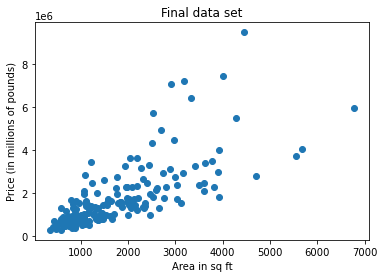

In [169]:
#replotting with the new data
plt.scatter(df1['Area in sq ft'], df1.Price)
plt.xlabel('Area in sq ft')
plt.ylabel('Price (in millions of pounds)')
plt.title('Final data set')

In [170]:
#Making the linear regression model
df1

,Price,Area in sq ft
3081,900000,902
2173,825000,687
136,1750000,1580
364,2100000,3596
368,1280000,1169
...,...,...
2992,2500000,1227
3146,807995,1650
188,765000,1362
203,1850000,2516


In [171]:
#manually setting w and b to play around with the best fit line
w = 1_000
b = 1_000

In [172]:
#plotting a linear function to play around with manually finding a best fit line
def linear_function(x, w, b):

    m = df1.shape[0]
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] = w * df1.iloc[i]['Area in sq ft'] + b
        
    return(y_pred)

In [173]:
linear_function = linear_function(x, w, b)

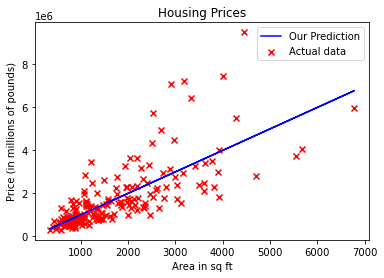

In [174]:
# Plot our model prediction
plt.plot(df1['Area in sq ft'], linear_function, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(df1['Area in sq ft'], df1.Price, marker='x', color='red', label='Actual data')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in millions of pounds)')
# Set the x-axis label
plt.xlabel('Area in sq ft')
plt.legend()
plt.show()

In [175]:
#making the cost function to calculate the error between the predictions and actual data
''''
def compute_cost(x, y, w, b):
   
    m = df1.shape[0]
    cost = 0
    
    for i in range(m):
        y_pred = w * df1.iloc[i]['Area in sq ft'] + b
        cost += (y_pred - df1.iloc[i]['Price'])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost
'''

"'\ndef compute_cost(x, y, w, b):\n   \n    m = df1.shape[0]\n    cost = 0\n    \n    for i in range(m):\n        y_pred = w * df1.iloc[i]['Area in sq ft'] + b\n        cost += (y_pred - df1.iloc[i]['Price'])**2\n    total_cost = 1 / (2 * m) * cost\n\n    return total_cost\n"

In [176]:
#w = 100
#b = 100
#f = compute_cost(df1['Area in sq ft'], df1['Price'], w, b)

In [177]:
def gradient_descent(data, w, b, L): 
    # Number of training examples
    m = df1.shape[0] 
    
    #initlialising the derivatives for w and b
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        
        x = df1.iloc[i]['Area in sq ft']
        y = df1.iloc[i]['Price']
        
        y_pred = w * x + b 
        dj_dw += (y_pred - y) * x 
        dj_db += y_pred - y 
        
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
    
    for i in range(epochs):
    if i % 50 == 0: 
        print(f"Epochs: {i}")
    w, b = gradient_descent(df1, w, b, dj_dw, dj_db, L)
    
    return dj_dw, dj_db


In [178]:
w = 1000
b = 1000
dj_dw, dj_db = compute_derivatives(df1, w , b)

In [179]:
print(dj_dw, dj_db)

3464023.5515463916 -18877.778350515466


In [ ]:
def gradient_descent(data, w, b, dj_dw, dj_db, L):
    w = w - L * dj_dw
    b = b - L * dj_db
    
    return(m, b)

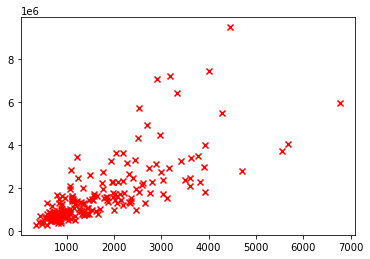

In [192]:
# Plot the data points
plt.scatter(df1['Area in sq ft'], df1.Price, marker='x', color='red', label='Actual data')
# Plot our model prediction
#plt.plot(df1['Area in sq ft'], [w * x + b for x in df1['Area in sq ft']], c='b',label='Our Prediction')